In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [147]:
def actual_f(x):
    return 0.2*((x-59)**2)+2

def regr_sided(X,Y,t,k,b):
    # Dispose points outside bandwidth
    YL=Y[np.logical_and(t-b<X,X<t)]
    XL=X[np.logical_and(t-b<X,X<t)]
    
    # Calculate weights
    get_weight=np.vectorize(lambda x:k((np.abs((x-t)))/b))
    WL=get_weight(XL)

    # Reshape for lib use
    # Every data has a single feature
    XL=XL.reshape(-1,1)
    YL=YL.reshape(-1,1)
    
    # Create linear regression object
    regrL = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regrL.fit(XL, YL, sample_weight=WL)
    
    return regrL


def bias(X,Y,t,k,i):
    final_regr=regr_sided(X,Y,t,k,i)
    true_err=(final_regr.predict([[t]])[0][0]-actual_f(t))**2
    return true_err

In [30]:
def get_data():
    n1=60
    n2=0.2
    m=18
    X=np.random.rand(n1)*10-5+59 #can change the distribution of X
    for i in range(1,m):
        A=59-0.1*i-np.random.rand(int(n2*(m-i)))*0.1*(m-i)
        X=np.hstack((X,A))
    for j in range(1,m):
        B=59-0.1*m-np.random.rand(int(n2*(m-j)))*0.1*(m-j)
        X=np.hstack((X,B))
    Y=np.vectorize(actual_f)(X)
    for k in range(1,3):
        Y=Y+0.6*np.random.rand(np.size(X))
    Y=Y-0.9
    Y=Y[np.logical_and(t-2.8**1.5<X,X<t)]
    X=X[np.logical_and(t-2.8**1.5<X,X<t)]
    return (X,Y)

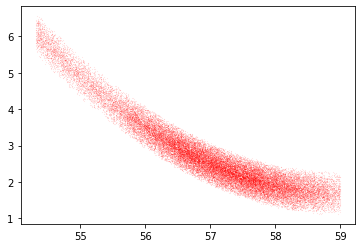

In [49]:
testset=[]
for i in range(500):
    v=get_data()
    testset.append(v)
    X,Y=v
    plt.scatter(X,Y,s=0.001,color='red')
plt.show()

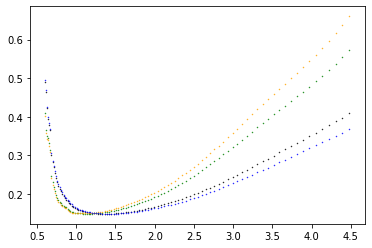

In [53]:
def repeat_test(t,k,b):
    errsum=0
    cnt=0
    for (X,Y) in testset:
        errsum+=bias(X,Y,t,k,b)
        cnt+=1
    return errsum/cnt

t=59
for i in np.exp(np.linspace(-0.5,1.5,100)):
    err=repeat_test(t,lambda x:(1-x)**2,i)
    plt.scatter(i, err, s=0.2, color='black')
    err=repeat_test(t,lambda x:2*(1-x),i)
    plt.scatter(i, err, s=0.2, color='green')
    err=repeat_test(t,lambda x:1-x**2,i)
    plt.scatter(i, err, s=0.2, color='orange')
    err=repeat_test(t,lambda x:1-(1-(1-x)**2)**0.5,i)
    plt.scatter(i, err, s=0.2, color='blue')
plt.show()

In [117]:
def bezier(p,t):
    # See https://javascript.info/bezier-curve
    if len(p)==1:
        # This is a little bit different from the real bezier-curve
        # p[0] is (x,y) of the point
        # but x!=t, and we need to control x
        # so using (t,y) instead
        return p[0][1]
    p2=[]
    for i in range(len(p)-1):
        p2.append((1-t)*p[i]+t*p[i+1])
    return bezier(p2,t)

In [132]:
def gen_param():
    p=np.array([np.array([0,1]),
                np.random.rand(2),
                np.random.rand(2),
                np.array([1,0])])
    return [lambda x:bezier(p,x),p]

param_set=[]
for i in range(10):
    param_set.append(gen_param())

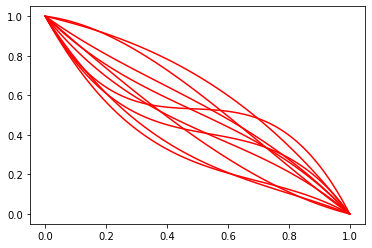

In [149]:
def plot_ker(ker):
    vker=np.vectorize(ker)
    X=np.linspace(0,1,100)
    Y=vker(X)
    plt.plot(X,Y,color='red')

for param in param_set:
    plot_ker(param[0])
plt.show()

From 0.6065306597126334
[array([[0.        , 1.        ],
       [0.496565  , 0.08616145],
       [0.07309824, 0.99591082],
       [1.        , 0.        ]])]


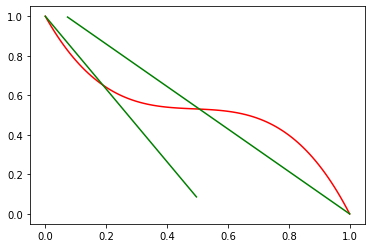

From 1.0255740711785708
[array([[0.        , 1.        ],
       [0.43258764, 0.87693057],
       [0.22579445, 0.65331744],
       [1.        , 0.        ]])]


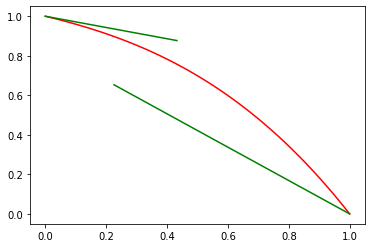

From 1.0465034351948705
[array([[0.        , 1.        ],
       [0.09818767, 0.63341251],
       [0.96149098, 0.53872988],
       [1.        , 0.        ]])]


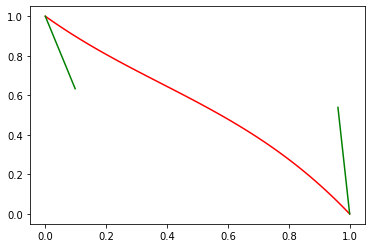

From 1.0896522251753413
[array([[0.        , 1.        ],
       [0.03617204, 0.93595903],
       [0.85528444, 0.37188961],
       [1.        , 0.        ]])]


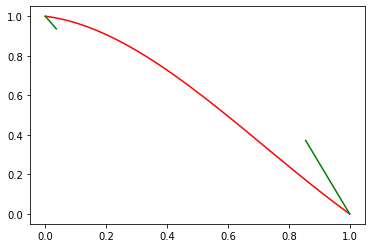

From 1.1577340001050354
[array([[0.        , 1.        ],
       [0.01416305, 0.55434219],
       [0.79379976, 0.12950944],
       [1.        , 0.        ]])]


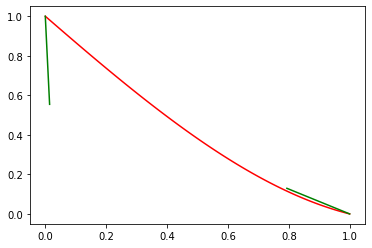

From 2.597489637435229
[array([[0.        , 1.        ],
       [0.03111542, 0.20673116],
       [0.16100385, 0.19708728],
       [1.        , 0.        ]])]


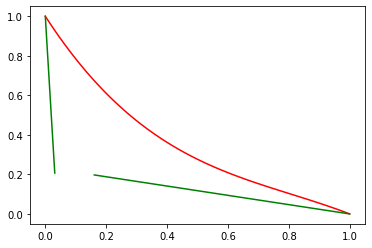

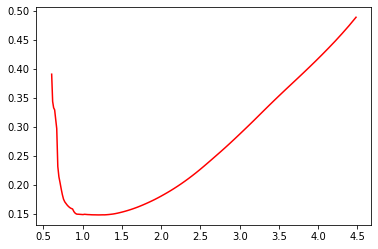

In [155]:
last_pick=None
result_curve_x=[]
result_curve_y=[]
result_cut_point=[]
t=59
for b in np.exp(np.linspace(-0.5,1.5,100)):
    err_min=1e100
    pick=None
    for param in param_set:
        ker=param[0]
        err=repeat_test(t,ker,b)
        if err<err_min:
            err_min=err
            pick=param
    if pick!=last_pick:
        last_pick=pick
        result_cut_point.append(b)
        print('From',b)
        print(pick[1:])
        plot_ker(pick[0])
        plt.plot([pick[1][0][0],pick[1][1][0]],[pick[1][0][1],pick[1][1][1]],color='green')
        plt.plot([pick[1][2][0],pick[1][3][0]],[pick[1][2][1],pick[1][3][1]],color='green')
        plt.show()
    result_curve_x.append(b)
    result_curve_y.append(err_min)
plt.plot(result_curve_x,result_curve_y,color='red')
for 
plt.show()